# New York City AirBnB Data Modeling and Analysis

Made for the University of San Diego
Course: AAI-510 (Machine learning: Fundamentals and Applications)
Professor: Wesley Pasfield, MS

By - Doug Code (dcode15), Subhabrata Ganguli (suvoganguli), Jeffrey Lehrer (J-Lehrer)

# Problem statement and justification for the proposed approach.


Business understanding - What does the business need?




## [Modify as necessary]

## Introduction

Airbnb, an online marketplace for lodging, has transformed the way people travel and find accommodations. In major cities like New York City, Airbnb listings provide a wide variety of options for travelers, ranging from entire apartments and homes to private rooms in shared apartments. This flexibility has made Airbnb a popular choice among both tourists and business travelers.

In this notebook, we will explore the Airbnb dataset for New York City. This dataset provides detailed information on listings available on Airbnb, including prices, locations, types of properties, and reviews. By analyzing this data, we can gain insights into the rental market in New York City, understand pricing strategies, identify popular neighborhoods, and much more.

## Dataset Description

The dataset used in this analysis is obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a website that provides publicly available data on Airbnb listings. 

## Objectives

In this analysis, the business needs are to achieve the following objectives:

1. **Data Exploration**: Understand the structure and contents of the dataset through summary statistics and visualizations.
2. **Price Analysis**: Analyze the pricing strategies of different types of listings and identify factors influencing prices.
3. **Geographical Analysis**: Examine the geographical distribution of listings and identify popular neighborhoods.
4. **Regression Analysis**: Predict the price of listing based on the test data


In [1]:
import optuna
import pandas as pd

from evaluation.ModelEvaluator import ModelEvaluator
from preprocessing.ColumnEncoder import ColumnEncoder
from preprocessing.ColumnSelector import ColumnSelector
from preprocessing.DataCleaner import DataCleaner
from preprocessing.DataImputer import DataImputer

# Add path to src
# current_dir = os.getcwd()
# src_path = os.path.join(current_dir, 'src')
# sys.path.append(src_path)

# Data understanding (EDA) – a graphical and non-graphical representation of relationships between the response variable and predictor variables.


Data understanding - What data do we have/need? Is it clean?


In [3]:
# Read data

df = pd.read_csv("../data/listings-full.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30314819,https://www.airbnb.com/rooms/30314819,20240406173624,2024-04-07,previous scrape,Brooklyn Finest Air Bnb,THE GUEST'S WILL HAVE ACCESS TO LOTS OF RESTAU...,NaN,https://a0.muscache.com/pictures/1ababa1b-a7d1...,224699779,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,30391955,https://www.airbnb.com/rooms/30391955,20240406173624,2024-04-07,previous scrape,Queens Comfort,Quiet neighborhood with plenty of on street pa...,10 min walk to Sutphin Av Archer Av Station wh...,https://a0.muscache.com/pictures/8d63479f-f4b6...,228213504,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,30378211,https://www.airbnb.com/rooms/30378211,20240406173624,2024-04-07,previous scrape,Shared Studio (females only),Bunk bed is shared with 1 other roommate (fema...,NaN,https://a0.muscache.com/pictures/500a4692-45da...,200401254,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
3,30459160,https://www.airbnb.com/rooms/30459160,20240406173624,2024-04-07,previous scrape,Large 2 Bedroom Apt - Close to everything!,Welcome to my massive two bedroom apt in eleva...,NaN,https://a0.muscache.com/pictures/a28e27f9-2360...,84147508,...,5.0,5.0,5.0,NaN,f,1,1,0,0,0.02
4,30746536,https://www.airbnb.com/rooms/30746536,20240406173624,2024-04-07,previous scrape,Stylish Single Room in Hell’s Kitchen,NaN,NaN,https://a0.muscache.com/pictures/6879386e-5133...,20416352,...,5.0,5.0,3.0,NaN,f,1,0,1,0,0.02


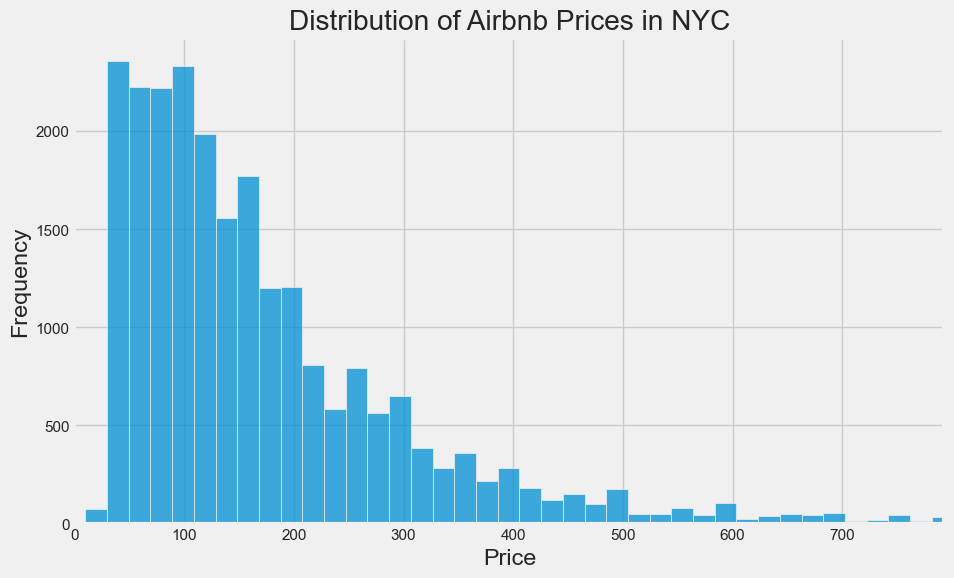

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df['price'] = df['price'].str.replace('$', '', regex=False).replace('None', None).replace('', None)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Set styles for the plots
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Histogram for price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=False)
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99))  # To limit the x-axis to the 99th percentile to avoid extreme outliers
plt.show()

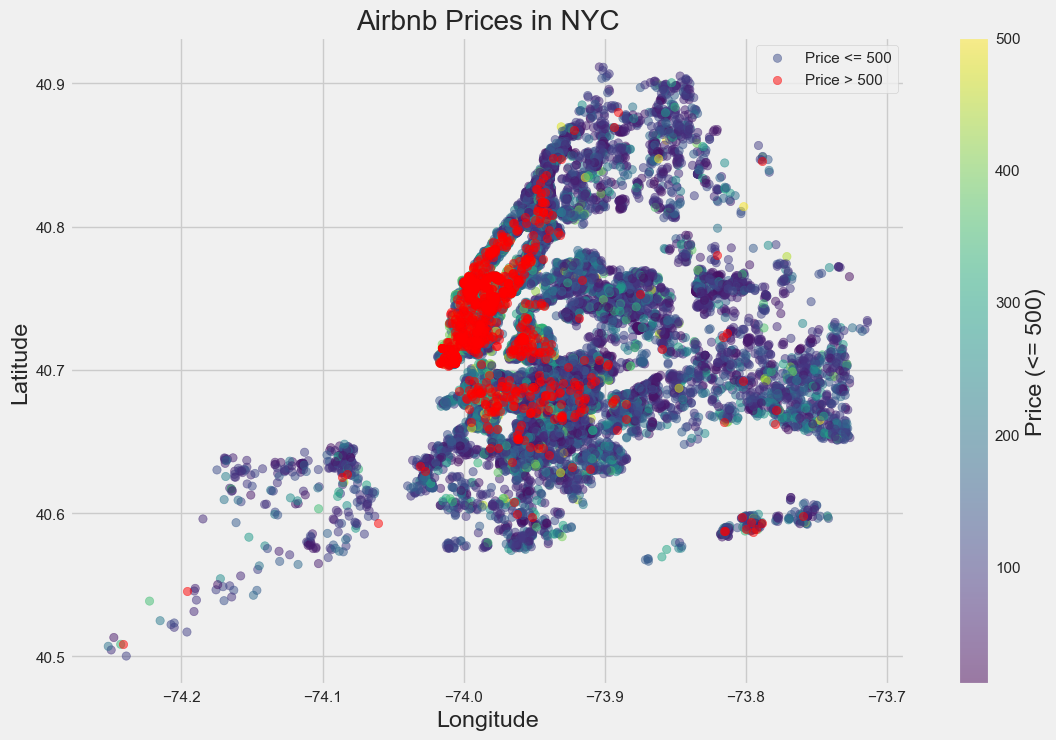

In [5]:
# Split the data into two groups
df_below_500 = df[df['price'] <= 500]
df_above_500 = df[df['price'] > 500]

# Plot the data
plt.figure(figsize=(12, 8))

# Scatter plot for prices <= 500
sc = plt.scatter(df_below_500['longitude'], df_below_500['latitude'], c=df_below_500['price'], cmap='viridis', alpha=0.5, label='Price <= 500')

# Scatter plot for prices > 1000
plt.scatter(df_above_500['longitude'], df_above_500['latitude'], color='red', alpha=0.5, label='Price > 500')

# Add color bar for the price <= 1000 points
cbar = plt.colorbar(sc, label='Price (<= 500)')

# Add titles and labels
plt.title('Airbnb Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_66552/755991337.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


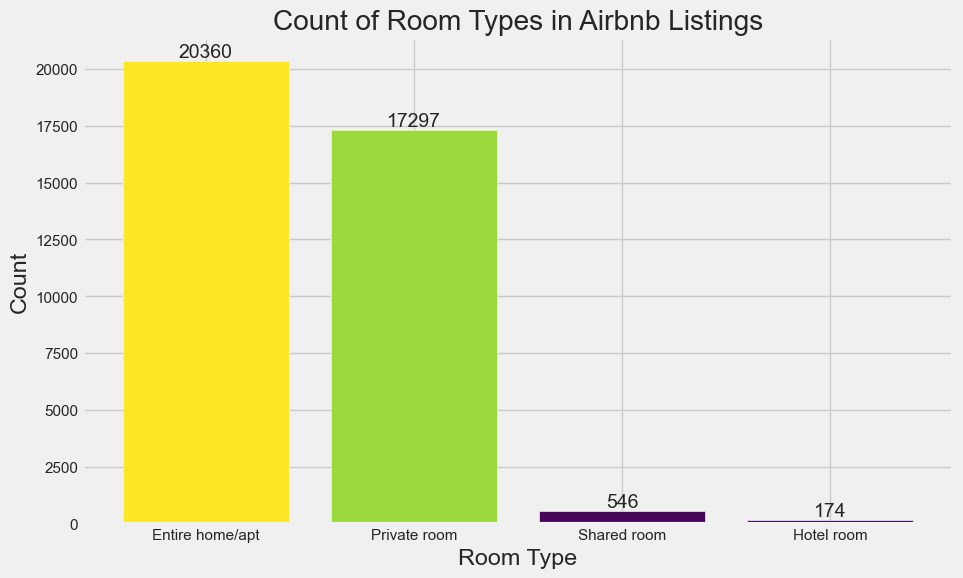

In [6]:
import matplotlib.cm as cm

# Count the occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Get the viridis colormap
cmap = cm.get_cmap('viridis')

# Normalize the color range
norm = plt.Normalize(room_type_counts.min(), room_type_counts.max())
colors = cmap(norm(room_type_counts.values))

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=colors)

# Add titles and labels
plt.title('Count of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(room_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

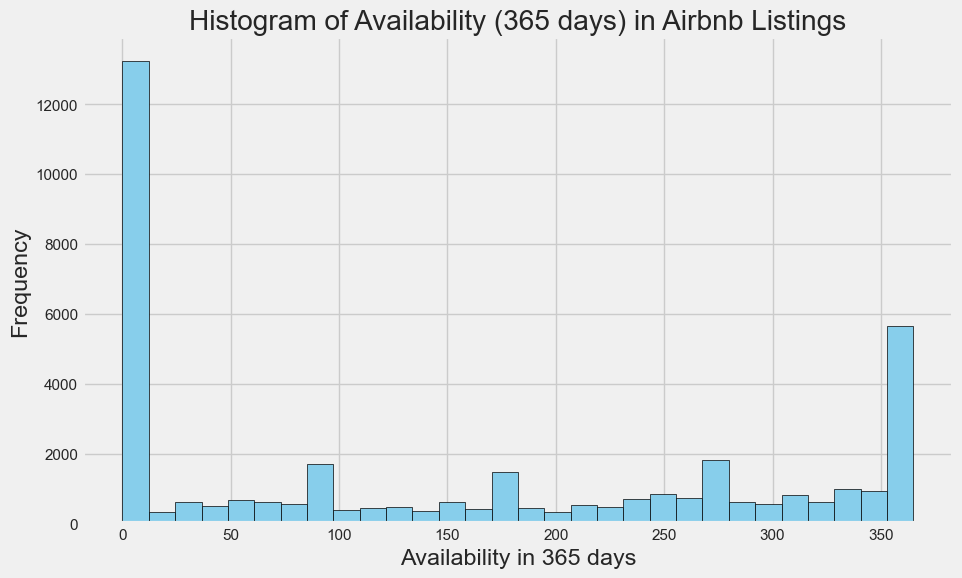

In [7]:
# Plot the histogram for availability_365
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Histogram of Availability (365 days) in Airbnb Listings')
plt.xlabel('Availability in 365 days')
plt.ylabel('Frequency')

plt.show()

## Boxplots for categorical features

The following plots show that there are several outliers corresponding to high price values. This can mean that we will not get a high R^2 score for regression since the variance of the price data is high.

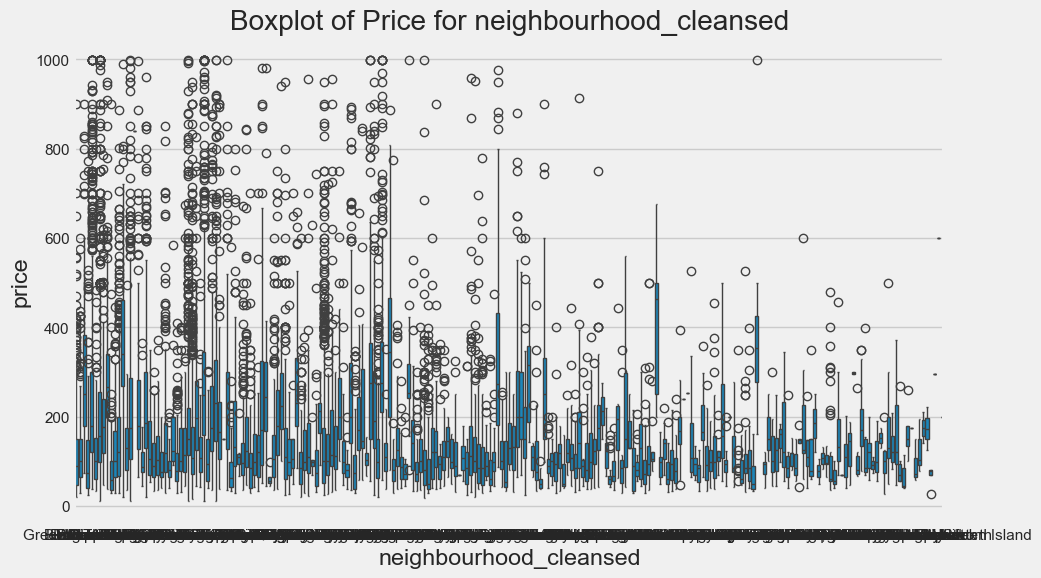

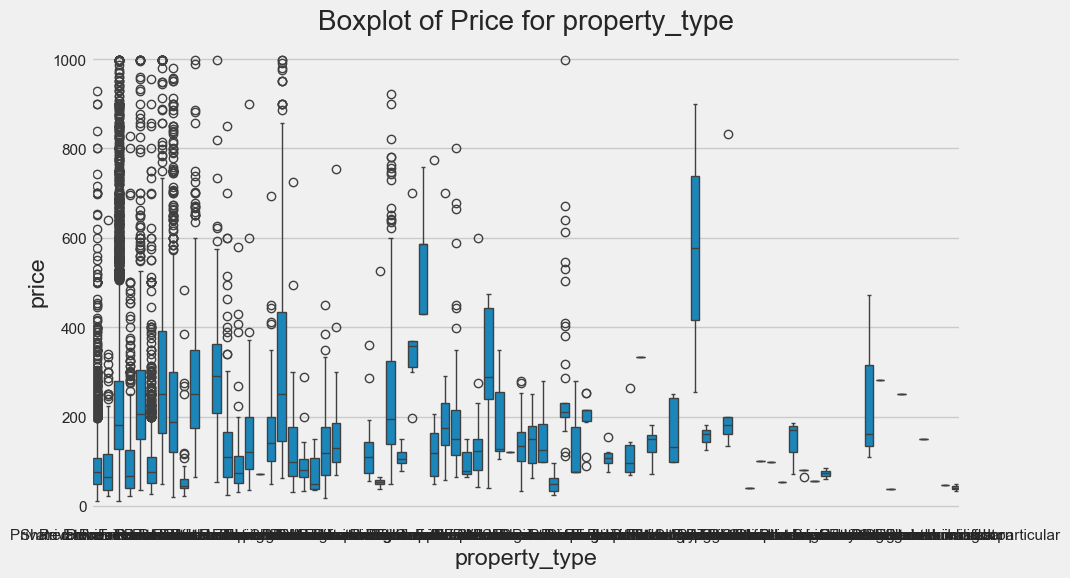

In [45]:
# Select the columns for train and test datasets
xy_train = df.copy()
xy_test = df.copy()

# Remove % sign and convert to numeric
xy_train['host_response_rate'] = xy_train['host_response_rate'].str.rstrip('%').astype('float') / 100
xy_train['host_acceptance_rate'] = xy_train['host_acceptance_rate'].str.rstrip('%').astype('float') / 100
xy_test['host_response_rate'] = xy_test['host_response_rate'].str.rstrip('%').astype('float') / 100
xy_test['host_acceptance_rate'] = xy_test['host_acceptance_rate'].str.rstrip('%').astype('float') / 100

# Identifying categorical features
categorical_features = xy_train.select_dtypes(include=['object']).columns

# Plotting boxplots for each categorical feature against price
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=xy_train)
    plt.title(f'Boxplot of Price for {feature}')
    plt.show()

# Data Preparation

In [2]:
# Perform initial data cleaning
data_path: str = "../data/listings-full.csv"
data: pd.DataFrame = pd.read_csv(data_path)
data = DataCleaner.perform_base_cleaning(data)
data = DataImputer.remove_outliers_iqr(data, ["price"])

# Feature Engineering

In [3]:
# Encode categorical columns
median_encode_columns = ['neighbourhood_cleansed']
one_hot_columns = ['neighbourhood_group_cleansed', 'property_type']
label_encode_columns = ['host_response_time']
frequency_encode_columns = ['room_type']

data = ColumnEncoder.one_hot_encode_columns(data, one_hot_columns)
data = ColumnEncoder.label_encode_columns(data, label_encode_columns)

train_data, val_data, test_data = DataCleaner.split_train_val_test(data)

train_data = ColumnEncoder.median_encode_columns(train_data, median_encode_columns, "price")
val_data = ColumnEncoder.median_encode_columns(val_data, median_encode_columns, "price")
test_data = ColumnEncoder.median_encode_columns(test_data, median_encode_columns, "price")

train_data = ColumnEncoder.frequency_encode_columns(train_data, frequency_encode_columns)
val_data = ColumnEncoder.frequency_encode_columns(val_data, frequency_encode_columns)
test_data = ColumnEncoder.frequency_encode_columns(test_data, frequency_encode_columns)

In [4]:
# Impute missing values
from sklearn.impute import SimpleImputer

mean_impute_columns = ['host_listings_count', 'room_type', 'accommodates', 'minimum_nights', 'maximum_minimum_nights',
                       'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm',
                       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count',
                       'dist_empire_state_building', 'dist_laguardia']
most_frequent_impute_columns = ['host_response_time', 'host_is_superhost', 'minimum_nights_avg_ntm', 'availability_60',
                                'availability_365', 'calculated_host_listings_count_shared_rooms', 'dist_high_line',
                                'dist_st_georges_theatre']
constant_impute_columns = ['neighbourhood_cleansed', 'maximum_nights', 'minimum_minimum_nights', 'availability_90',
                           'number_of_reviews', 'dist_central_park', 'dist_brooklyn_bridge']

train_data = DataImputer.impute_missing_values(train_data, mean_impute_columns, SimpleImputer(strategy="mean"))
val_data = DataImputer.impute_missing_values(val_data, mean_impute_columns, SimpleImputer(strategy="mean"))
test_data = DataImputer.impute_missing_values(test_data, mean_impute_columns, SimpleImputer(strategy="mean"))

train_data = DataImputer.impute_missing_values(train_data, most_frequent_impute_columns,
                                               SimpleImputer(strategy="most_frequent"))
val_data = DataImputer.impute_missing_values(val_data, most_frequent_impute_columns,
                                             SimpleImputer(strategy="most_frequent"))
test_data = DataImputer.impute_missing_values(test_data, most_frequent_impute_columns,
                                              SimpleImputer(strategy="most_frequent"))

train_data = DataImputer.impute_missing_values(train_data, constant_impute_columns,
                                               SimpleImputer(strategy="constant", fill_value=-9999))
val_data = DataImputer.impute_missing_values(val_data, constant_impute_columns,
                                             SimpleImputer(strategy="constant", fill_value=-9999))
test_data = DataImputer.impute_missing_values(test_data, constant_impute_columns,
                                              SimpleImputer(strategy="constant", fill_value=-9999))

train_data = DataImputer.impute_missing_values(train_data, data.columns, SimpleImputer(strategy="median"))
val_data = DataImputer.impute_missing_values(val_data, data.columns, SimpleImputer(strategy="median"))
test_data = DataImputer.impute_missing_values(test_data, data.columns, SimpleImputer(strategy="median"))

In [5]:
# Use recursive feature elimination for feature selection
x_train, y_train, x_val, y_val, x_test, y_test = DataCleaner.perform_x_y_split(train_data, val_data, test_data)

n_features = 60
top_columns = ColumnSelector.recursive_feature_elimination(x_train, y_train, n_features)
print(f"Top columns: {top_columns}")
x_train = x_train[top_columns]
x_val = x_val[top_columns]
x_test = x_test[top_columns]

Top columns: ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'longitude', 'dist_times_square', 'dist_central_park', 'dist_empire_state_building', 'dist_statue_of_liberty', 'dist_brooklyn_bridge', 'dist_high_line', 'dist_gantry_plaza', 'amenity_ha

# Modeling

## Histogram Gradient Boosting Algorithm

In [6]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [7]:
# Tune histogram gradient boosting regressor hyperparameters
from tuners.HistGradientBoostingRegressorTuner import HistGradientBoostingRegressorTuner

study = optuna.create_study(direction='minimize')
study.optimize(HistGradientBoostingRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=100)
print(f"Best hyperparameters: {study.best_params}")

Best hyperparameters: {'learning_rate': 0.10843781383787221, 'max_iter': 324, 'max_depth': 10, 'min_samples_leaf': 16, 'l2_regularization': 0.44070390480011, 'max_leaf_nodes': 172, 'max_bins': 254, 'early_stopping': True, 'validation_fraction': 0.1594203268181018, 'tol': 0.0007295260718517506}


In [13]:
# Train histogram gradient boosting regressor model
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(**study.best_params, random_state=1).fit(x_train, y_train)

{'mse': 2451.6324127017765, 'rmse': 49.513961795656954, 'mae': 33.514247154517186}


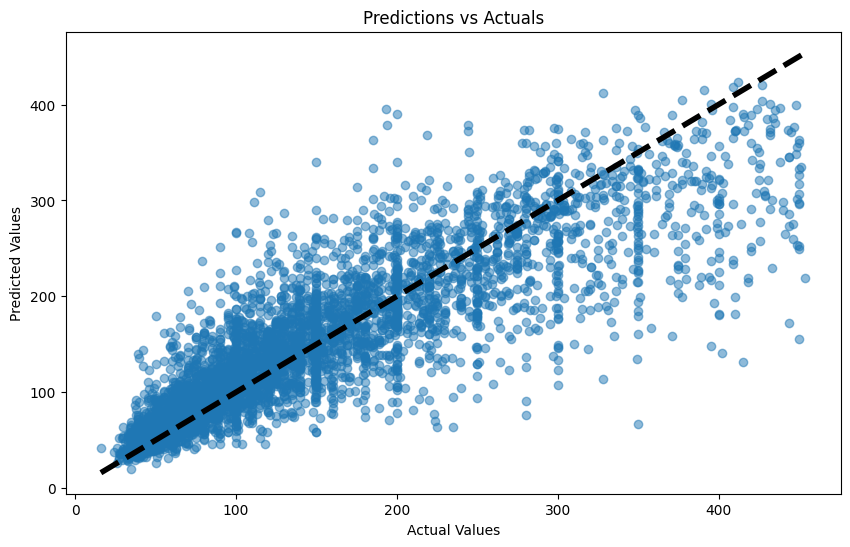

In [15]:
# Evaluate histogram gradient boosting regressor model
preds = model.predict(x_test)
print(ModelEvaluator.get_key_metrics(y_test, preds))
ModelEvaluator.plot_predictions_vs_actuals(y_test, preds)

## Random Forest Regressor

In [ ]:
from tuners.RandomForestRegressorTuner import RandomForestRegressorTuner

study = optuna.create_study(direction='minimize')
study.optimize(RandomForestRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=100)
print(f"Best hyperparameters: {study.best_params}")

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(**study.best_params, random_state=1).fit(x_train, y_train)

[I 2024-06-08 11:50:05,072] A new study created in memory with name: no-name-d7ce8419-2d59-4045-882a-c92c5928952b


Performing hyperparameter tuning.


Hyperparameter Tuning Progress: 100%|███████████| 10/10 [00:21<00:00,  2.16s/it]


Training model.


Model Training Progress: 100%|████████████████████| 1/1 [00:03<00:00,  3.43s/it]


Evaluating model.
{'mse': 3081.7103360513147, 'rmse': 55.51315462168687, 'mae': 38.76089340364307, 'r2': 0.7091364438565846}


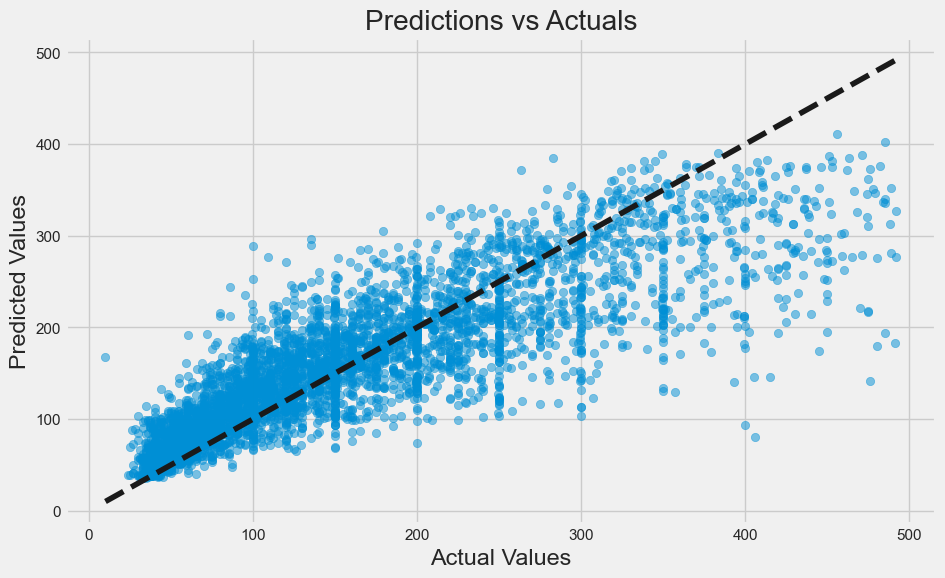

In [42]:
preds = model.predict(x_test)
print(ModelEvaluator.get_key_metrics(y_test, preds))
ModelEvaluator.plot_predictions_vs_actuals(y_test, preds)

## Gradient Boosting Regressor Algorithm

In [ ]:
from tuners.GradientBoostingRegressorTuner import GradientBoostingRegressorTuner

study = optuna.create_study(direction='minimize')
study.optimize(GradientBoostingRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=100)
print(f"Best hyperparameters: {study.best_params}")

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(**study.best_params, random_state=1).fit(x_train, y_train)

[I 2024-06-08 11:53:01,130] A new study created in memory with name: no-name-38bb3ebb-d866-4cb9-81c7-5db85ad5ec3c


Performing hyperparameter tuning.


Hyperparameter Tuning Progress: 100%|███████████| 10/10 [00:54<00:00,  5.48s/it]


Training model.


Model Training Progress: 100%|████████████████████| 1/1 [00:12<00:00, 12.50s/it]


Evaluating model.
{'mse': 2769.6677254178235, 'rmse': 52.62763271721258, 'mae': 36.53338986612476, 'r2': 0.7385882136531672}


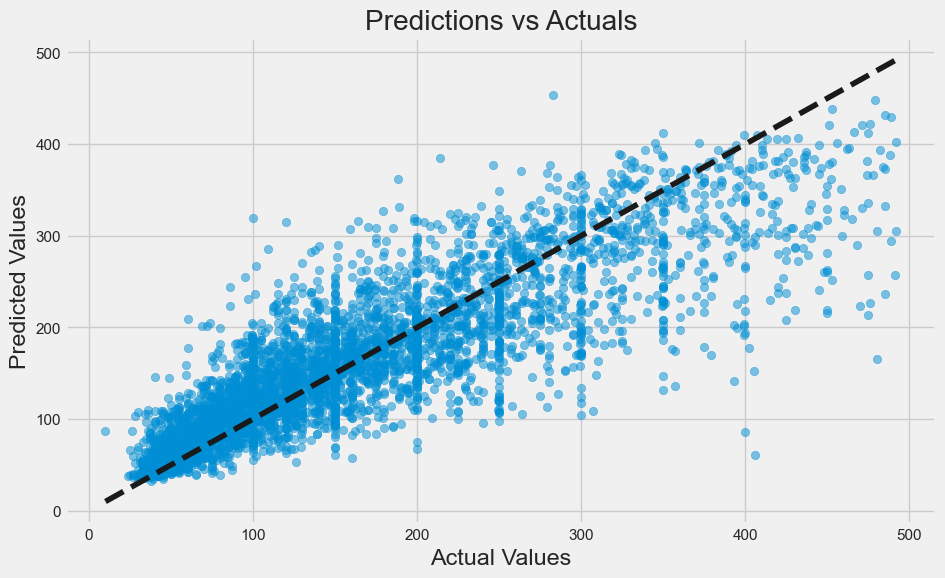

In [45]:
preds = model.predict(x_test)
print(ModelEvaluator.get_key_metrics(y_test, preds))
ModelEvaluator.plot_predictions_vs_actuals(y_test, preds)

## Extreme Gradient Boosting Regressor Algorithm

In [ ]:
from tuners.XGBRegressorTuner import XGBRegressorTuner

study = optuna.create_study(direction='minimize')
study.optimize(XGBRegressorTuner.tune(x_train, y_train, x_val, y_val), n_trials=100)
print(f"Best hyperparameters: {study.best_params}")

In [46]:
from xgboost import XGBRegressor

model = XGBRegressor(**study.best_params, random_state=1).fit(x_train, y_train)

[I 2024-06-08 11:54:57,099] A new study created in memory with name: no-name-768b4b9f-9bd5-4de6-be05-f2b03e00b585


Performing hyperparameter tuning.


Hyperparameter Tuning Progress: 100%|███████████| 10/10 [00:12<00:00,  1.30s/it]


Training model.


Model Training Progress: 100%|████████████████████| 1/1 [00:02<00:00,  2.19s/it]


Evaluating model.
{'mse': 2817.207865755291, 'rmse': 53.077376213932155, 'mae': 36.569376747758916, 'r2': 0.7341011941833779}


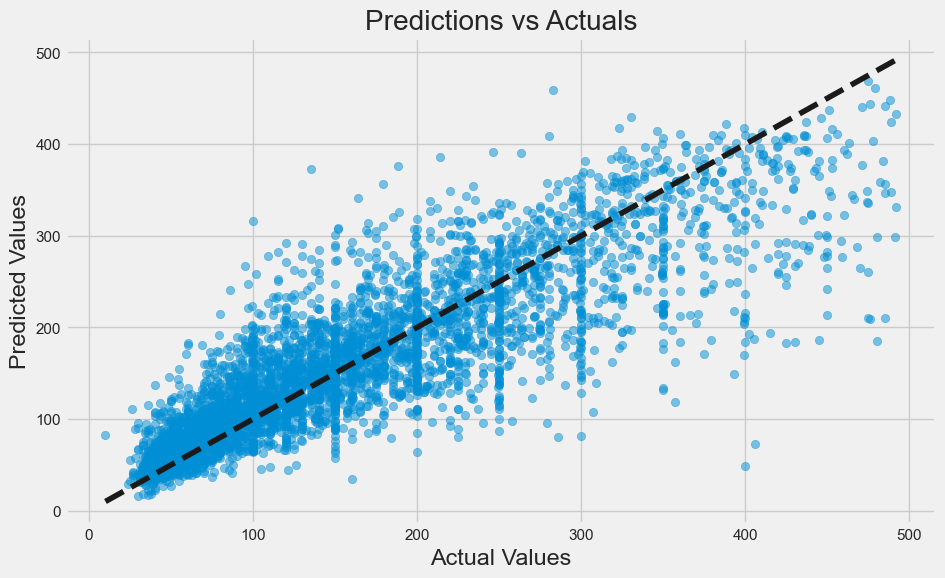

In [47]:
val_preds = model.predict(x_val)
print(ModelEvaluator.get_key_metrics(y_val, val_preds))
ModelEvaluator.plot_predictions_vs_actuals(y_val, val_preds)

# Evaluation – performance measures, results, and conclusions.


Evaluation - Which model best meets the business objectives?

The R^2 scores for the algorithms used are as follows:
1. **Histogram Gradient Boosting Algorithm**: 0.738
2. **Random Forest Regressor**: 0.709
4. **Gradient Boosting Regressor Algorithm**: 0.738
5. **Extreme Gradient Boosting Regressor Algorithm**: 0.734

Based on the above both Histogram Gradient Boosting Algorithm or Gradient Boosting Regressor Algorithm are giving highest score of 0.738. Hence, either of them can be used.

# Discussion and conclusions – address the problem statement and recommendation.

Deployment - How to get the model in production and ensure it works?

# References and Sources

GitHub link: https://github.com/suvoganguli/AAI510_FinalProject

